In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [111]:
df=pd.read_csv('dataset.csv')

In [112]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Admission_Date,Visit_Type,ICU_Admission,Bed_Occupancy_Rate_x,...,Satisfaction,Hour,DayOfWeek,DateOnly,Bed_Occupancy_Rate_y,ICU_Occupancy_Rate_y,Bed_Occupancy_Rate,ICU_Occupancy_Rate,Emergency_Flag,Recent_Emergencies_24h
0,P000072,33,Female,Fractured Arm,X-Ray and Splint,500,2023-01-01 02:00:00,Emergency,0,0.796,...,4,2,6,2023-01-01,0.518,0.7125,0.7,0.65,1,1.0
1,P000888,63,Male,Diabetes,Insulin Therapy,2811,2023-01-01 11:00:00,Emergency,1,0.724,...,2,11,6,2023-01-01,0.518,0.7125,0.7,0.65,1,2.0
2,P000786,74,Female,Heart Attack,Cardiac Catheterization,17968,2023-01-01 16:00:00,Emergency,1,0.590,...,2,16,6,2023-01-01,0.518,0.7125,0.7,0.65,1,3.0
3,P000004,33,Female,Fractured Arm,X-Ray and Splint,500,2023-01-01 18:00:00,Emergency,0,0.726,...,6,18,6,2023-01-01,0.518,0.7125,0.7,0.65,1,4.0
4,P000822,73,Male,Hypertension,Medication and Counseling,1195,2023-01-02 20:00:00,Emergency,0,0.798,...,4,20,0,2023-01-02,0.750,0.4375,0.7,0.65,1,5.0


In [113]:
df.shape

(1500, 25)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1500 non-null   object 
 1   Age                     1500 non-null   int64  
 2   Gender                  1500 non-null   object 
 3   Condition               1500 non-null   object 
 4   Procedure               1500 non-null   object 
 5   Cost                    1500 non-null   int64  
 6   Admission_Date          1500 non-null   object 
 7   Visit_Type              1500 non-null   object 
 8   ICU_Admission           1500 non-null   int64  
 9   Bed_Occupancy_Rate_x    1500 non-null   float64
 10  ICU_Occupancy_Rate_x    1500 non-null   float64
 11  Staff_Workload_Score    1500 non-null   float64
 12  Staff_Load_Level        1500 non-null   object 
 13  Outcome                 1500 non-null   object 
 14  Readmission             1500 non-null   

In [115]:
df.isnull().sum()

Patient_ID                0
Age                       0
Gender                    0
Condition                 0
Procedure                 0
Cost                      0
Admission_Date            0
Visit_Type                0
ICU_Admission             0
Bed_Occupancy_Rate_x      0
ICU_Occupancy_Rate_x      0
Staff_Workload_Score      0
Staff_Load_Level          0
Outcome                   0
Readmission               0
Satisfaction              0
Hour                      0
DayOfWeek                 0
DateOnly                  0
Bed_Occupancy_Rate_y      0
ICU_Occupancy_Rate_y      0
Bed_Occupancy_Rate        0
ICU_Occupancy_Rate        0
Emergency_Flag            0
Recent_Emergencies_24h    0
dtype: int64

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.drop(columns=[
    'Bed_Occupancy_Rate_x',
    'ICU_Occupancy_Rate_x',
    'Bed_Occupancy_Rate',
    'ICU_Occupancy_Rate',
], inplace=True, errors='ignore')

In [118]:
df['Bed_Occupancy_Rate'] = df['Bed_Occupancy_Rate_y']
df['ICU_Occupancy_Rate'] = df['ICU_Occupancy_Rate_y']

In [119]:
df.drop(columns=[
    'Bed_Occupancy_Rate_y',
    'ICU_Occupancy_Rate_y',
], inplace=True, errors='ignore')

In [120]:
numeric_cols = [
    'Age',
    'Cost',
    'Bed_Occupancy_Rate',
    'ICU_Occupancy_Rate',
    'Satisfaction'
]
df[numeric_cols].skew()

Age                  -0.231336
Cost                  0.746396
Bed_Occupancy_Rate    0.059678
ICU_Occupancy_Rate    0.097416
Satisfaction         -0.170601
dtype: float64

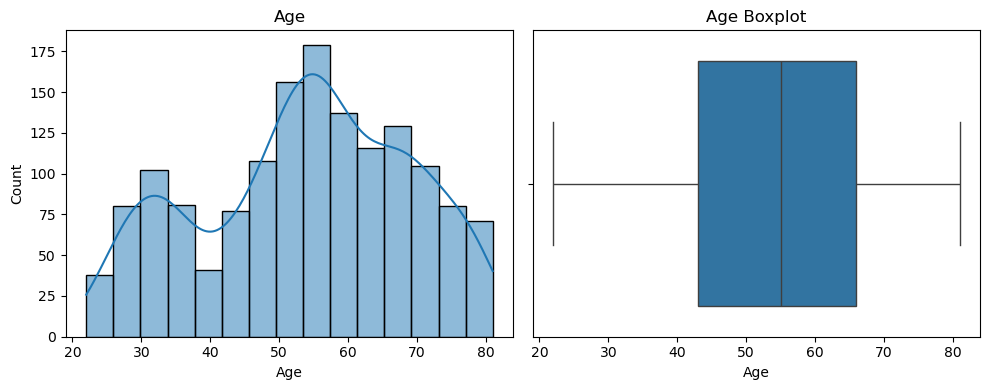

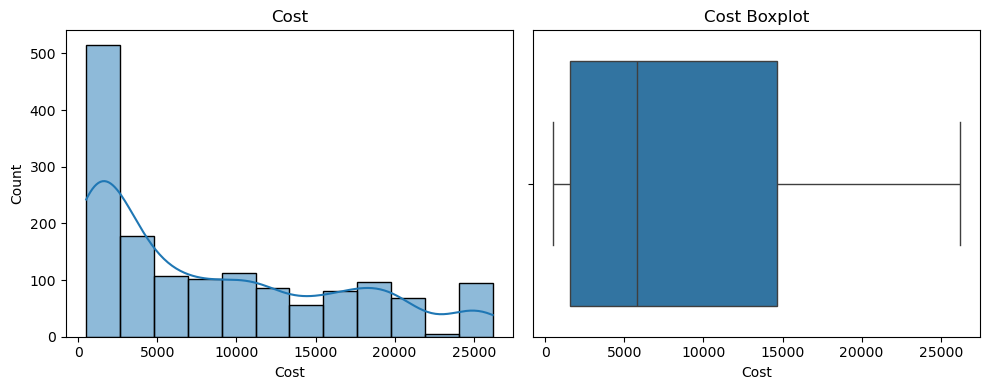

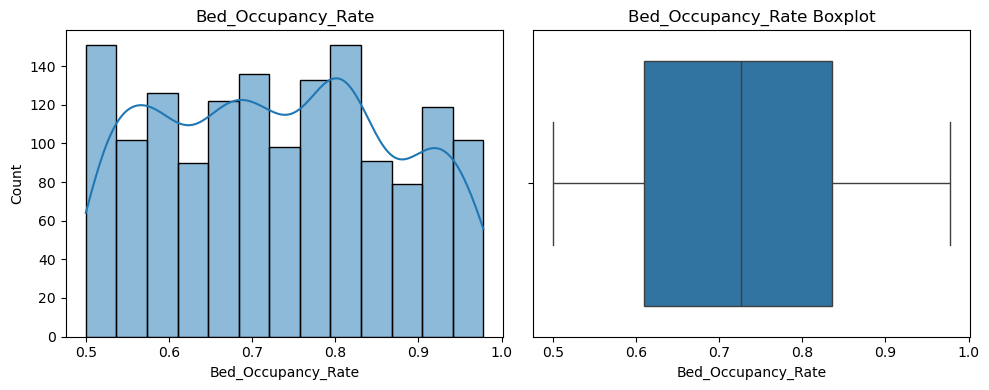

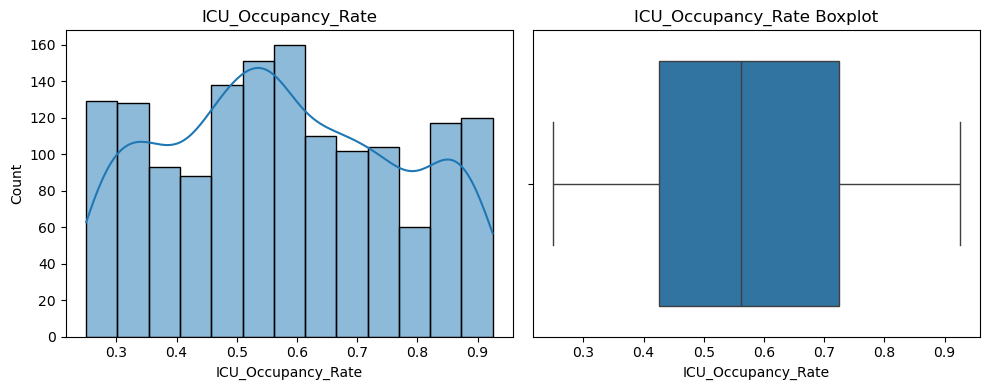

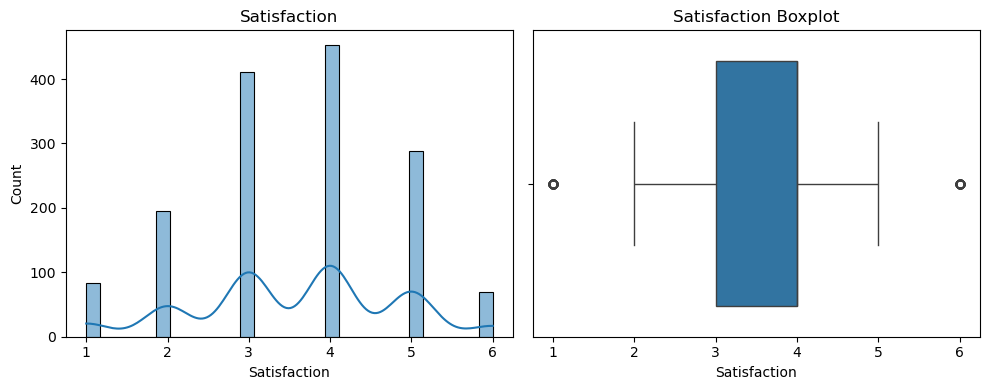

In [121]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

In [122]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = pt.fit_transform(df[numeric_cols])
print("Skew after Yeo-Johnson:")
print(df[numeric_cols].skew())

Skew after Yeo-Johnson:
Age                  -0.124438
Cost                 -0.121060
Bed_Occupancy_Rate   -0.009749
ICU_Occupancy_Rate   -0.015034
Satisfaction         -0.068327
dtype: float64


In [123]:
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)

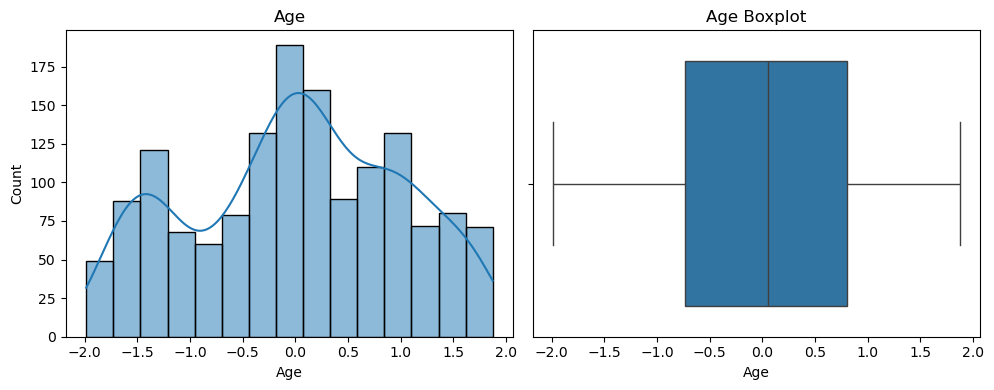

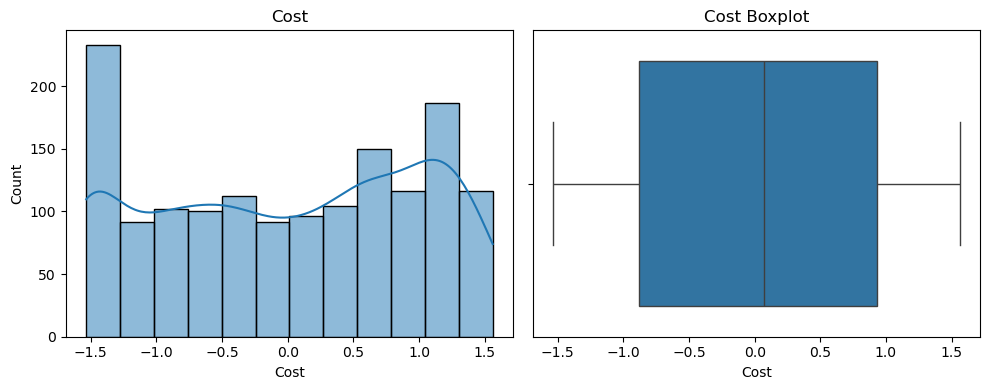

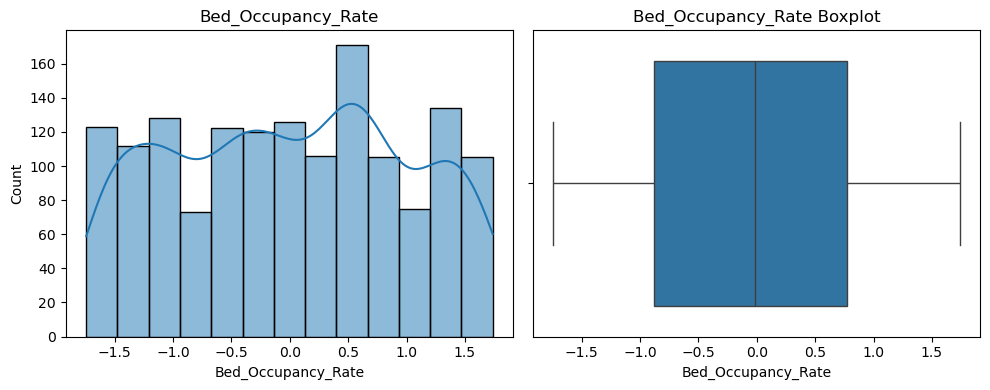

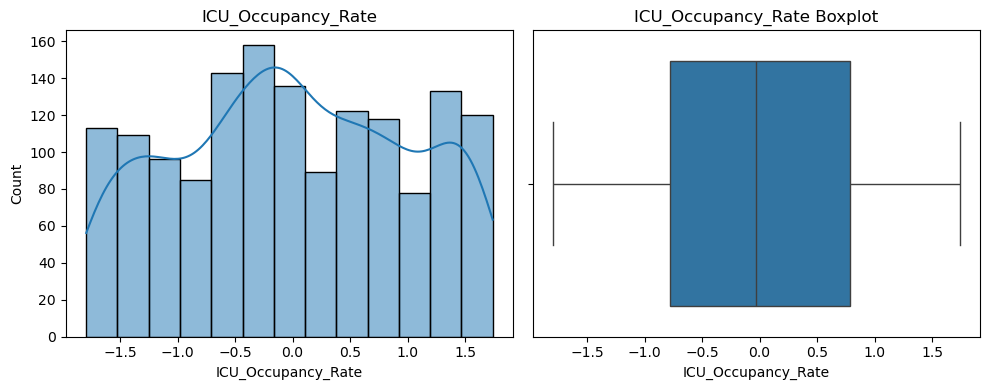

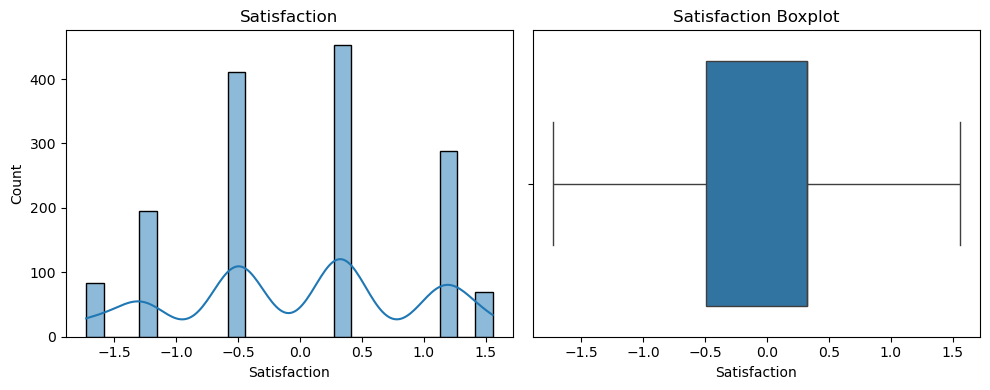

In [124]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

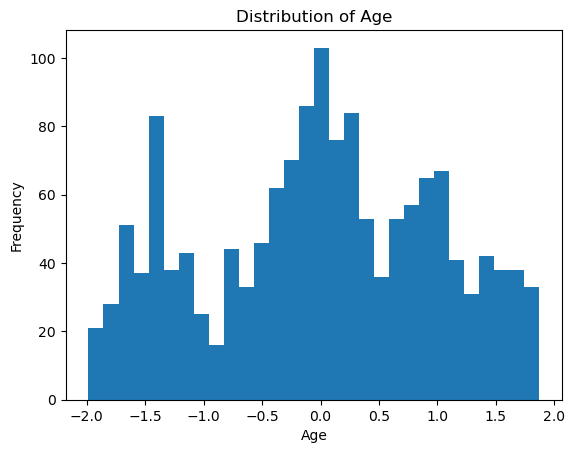

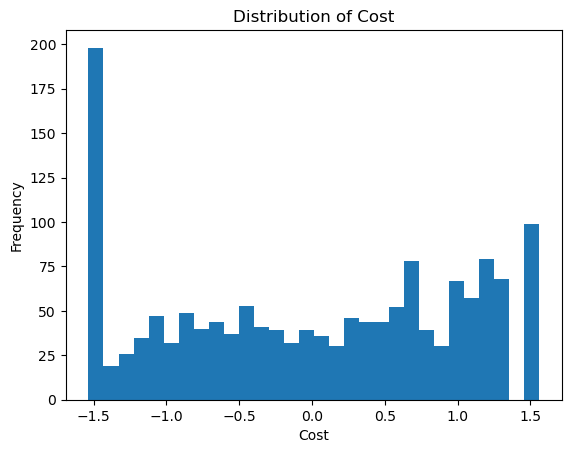

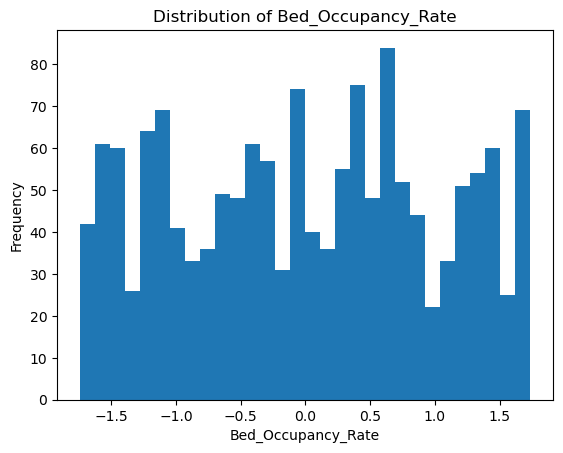

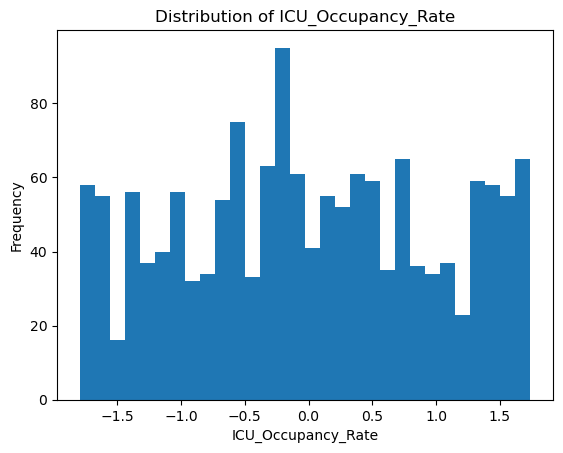

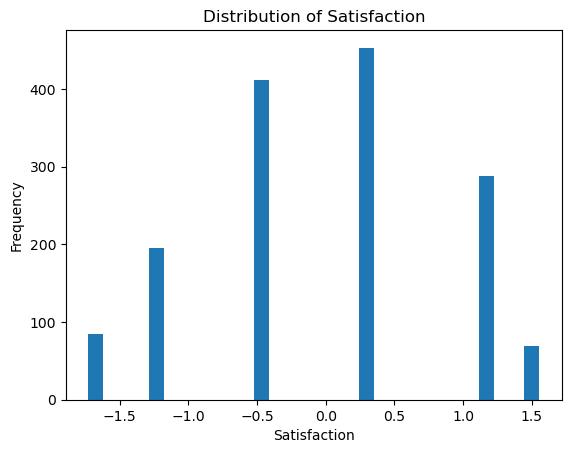

In [125]:

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


ICU_Admission
0    999
1    501
Name: count, dtype: int64
ICU_Admission
0    66.6
1    33.4
Name: proportion, dtype: float64


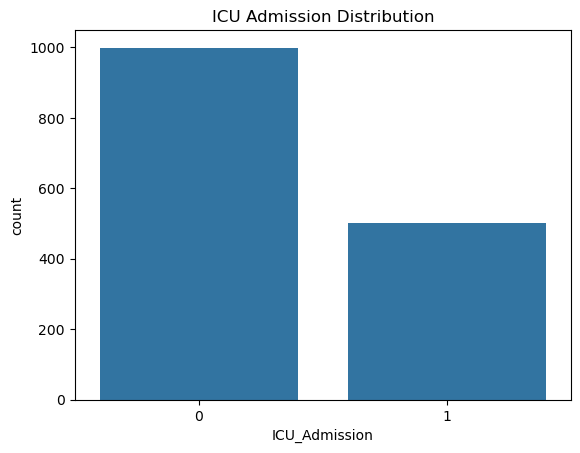

In [126]:
print(df['ICU_Admission'].value_counts())
print(df['ICU_Admission'].value_counts(normalize=True)*100)

sns.countplot(x='ICU_Admission', data=df)
plt.title('ICU Admission Distribution')
plt.show()

Visit_Type
Emergency    1026
Scheduled     474
Name: count, dtype: int64


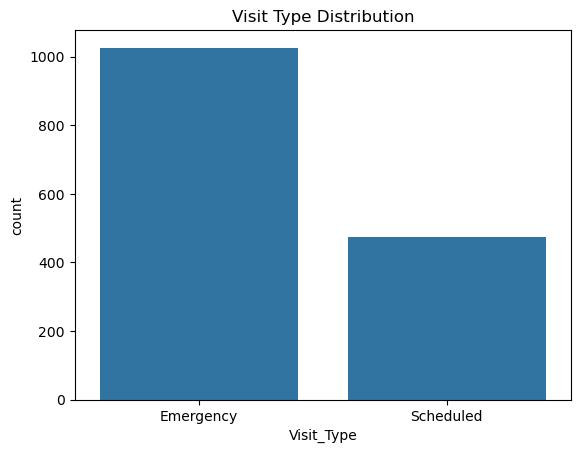

In [127]:
print(df['Visit_Type'].value_counts())

sns.countplot(x='Visit_Type', data=df)
plt.title('Visit Type Distribution')
plt.show()

Gender
Female    784
Male      716
Name: count, dtype: int64


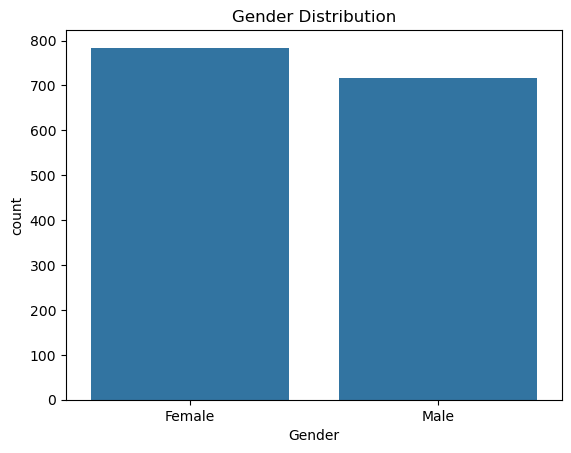

In [128]:
print(df['Gender'].value_counts())

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


Condition
Fractured Leg            106
Heart Attack             105
Allergic Reaction        105
Diabetes                 104
Fractured Arm            102
Respiratory Infection    102
Kidney Stones            102
Stroke                   101
Prostate Cancer           99
Hypertension              99
Cancer                    99
Heart Disease             97
Osteoarthritis            95
Childbirth                94
Appendicitis              90
Name: count, dtype: int64


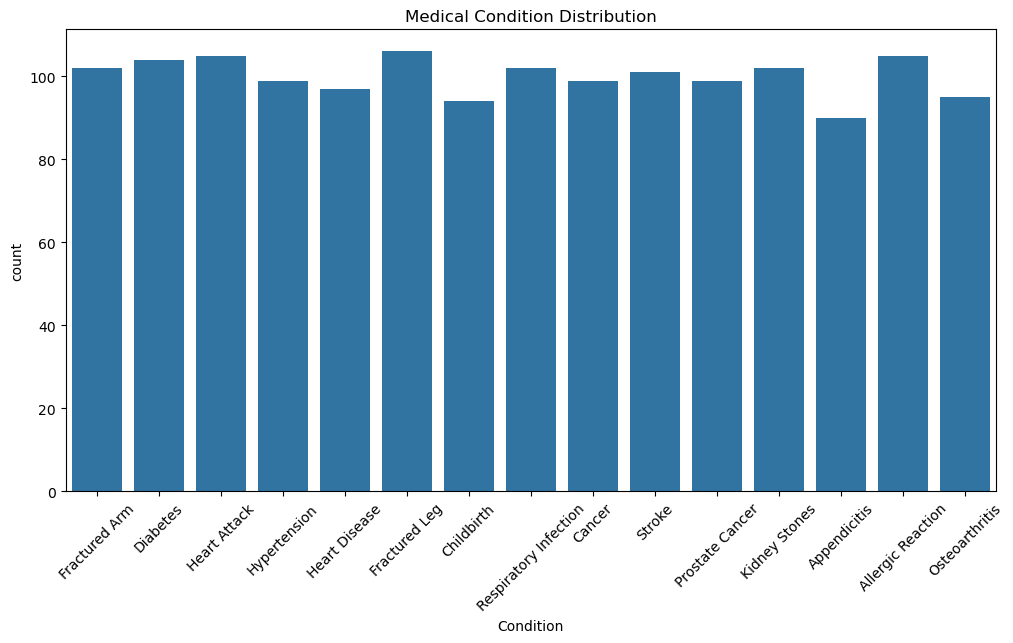

In [129]:
print(df['Condition'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x='Condition', data=df)
plt.title('Medical Condition Distribution')
plt.xticks(rotation=45)
plt.show()

   Satisfaction  Satisfaction_clean
0      0.324235                   0
1     -1.284545                  -1
2     -1.284545                  -1
3      1.555010                   2
4      0.324235                   0
Satisfaction_clean
-2     84
-1    195
 0    864
 1    288
 2     69
Name: count, dtype: int64


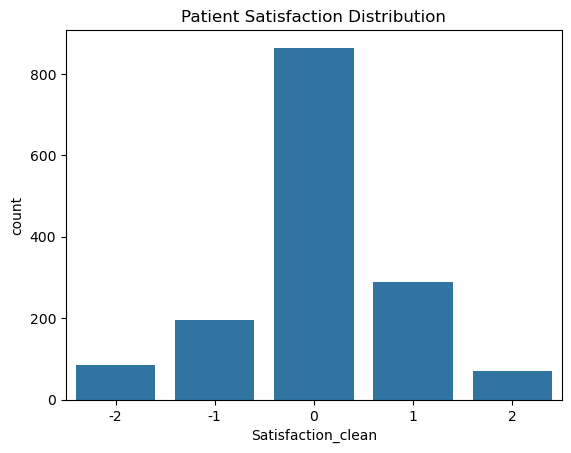

In [130]:
df['Satisfaction_clean'] = df['Satisfaction'].round().astype(int)
print(df[['Satisfaction', 'Satisfaction_clean']].head())
print(df['Satisfaction_clean'].value_counts().sort_index())

sns.countplot(x='Satisfaction_clean', data=df)
plt.title('Patient Satisfaction Distribution')
plt.show()

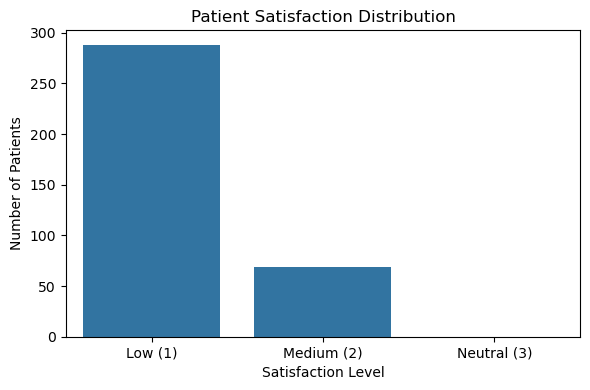

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Satisfaction_clean',
    order=[1, 2, 3]
)
plt.title('Patient Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Patients')
plt.xticks(
    [0, 1, 2],  
    ['Low (1)', 'Medium (2)', 'Neutral (3)']
)
plt.tight_layout()
plt.show()

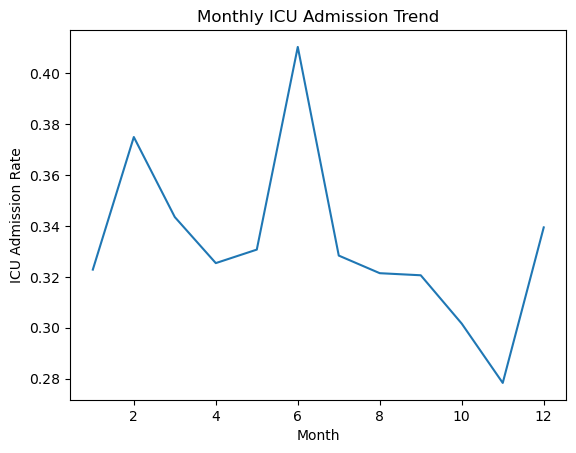

In [132]:
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])
df['Month'] = df['Admission_Date'].dt.month
df.groupby('Month')['ICU_Admission'].mean().plot(kind='line')
plt.title('Monthly ICU Admission Trend')
plt.ylabel('ICU Admission Rate')
plt.xlabel('Month')
plt.show()


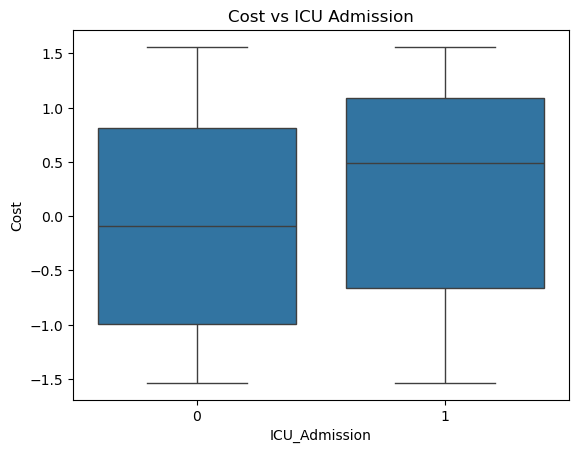

In [133]:
sns.boxplot(x='ICU_Admission', y='Cost', data=df)
plt.title('Cost vs ICU Admission')
plt.show()

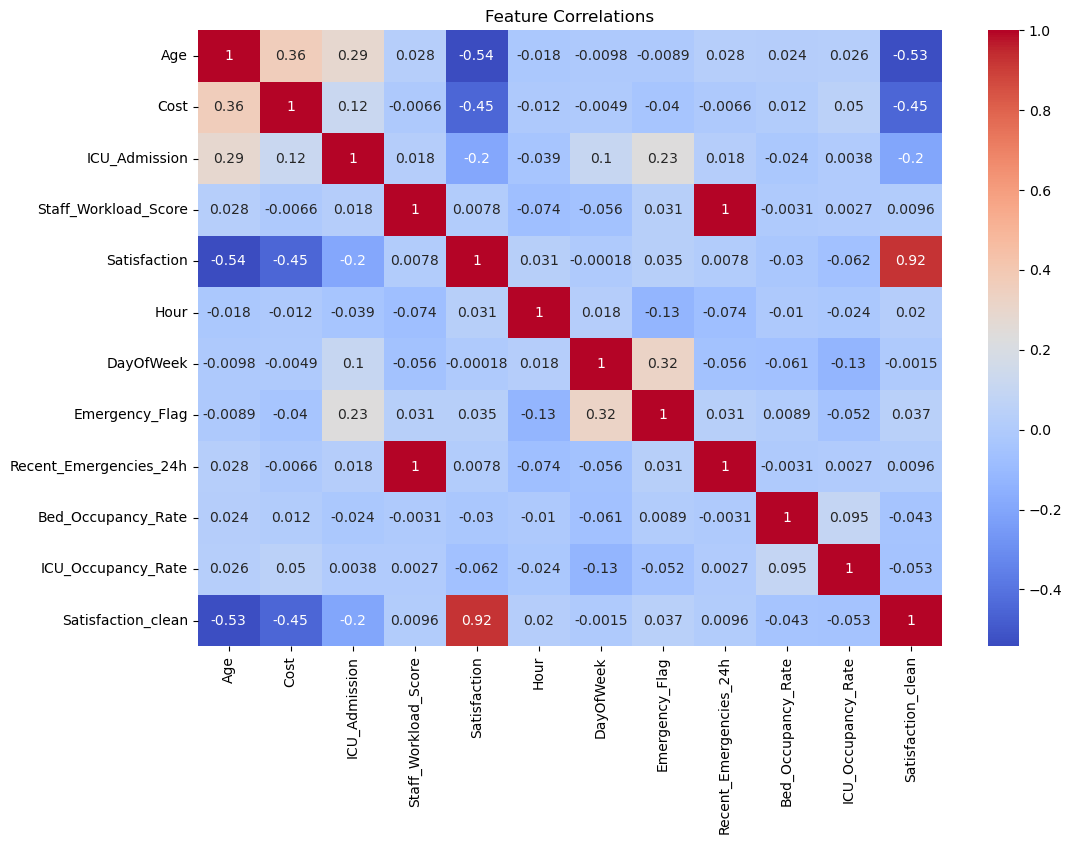

In [134]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm',
    annot=True
)
plt.title('Feature Correlations')
plt.show()

In [135]:
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])
df['Month'] = df['Admission_Date'].dt.month
df['DayOfWeek'] = df['Admission_Date'].dt.dayofweek
df['Is_Weekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [136]:
df['Hospital_Load_Index'] = (
    df['Bed_Occupancy_Rate'] * 0.4 +
    df['ICU_Occupancy_Rate'] * 0.6
)

df['Cost_Normalized'] = (
    (df['Cost'] - df['Cost'].min()) /
    (df['Cost'].max() - df['Cost'].min())
)

df['Emergency_Risk_Score'] = (
    df['Hospital_Load_Index'] * 0.6 +
    df['Cost_Normalized'] * 0.4
)

df['Emergency_Risk_Level'] = pd.cut(
    df['Emergency_Risk_Score'],
    bins=[-1, 0.4, 0.7, 1],
    labels=["Low", "Moderate", "High"]
)

In [137]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Admission_Date,Visit_Type,ICU_Admission,Staff_Workload_Score,...,Recent_Emergencies_24h,Bed_Occupancy_Rate,ICU_Occupancy_Rate,Satisfaction_clean,Month,Is_Weekend,Hospital_Load_Index,Cost_Normalized,Emergency_Risk_Score,Emergency_Risk_Level
0,P000072,-1.351598,Female,Fractured Arm,X-Ray and Splint,-1.535197,2023-01-01 02:00:00,Emergency,0,34.0,...,1.0,-1.599704,0.727915,0,1,1,-0.203133,0.000000,-0.121880,Low
1,P000888,0.594580,Male,Diabetes,Insulin Therapy,-0.489414,2023-01-01 11:00:00,Emergency,1,34.5,...,2.0,-1.599704,0.727915,-1,1,1,-0.203133,0.337734,0.013214,Low
2,P000786,1.367454,Female,Heart Attack,Cardiac Catheterization,1.144611,2023-01-01 16:00:00,Emergency,1,35.0,...,3.0,-1.599704,0.727915,-1,1,1,-0.203133,0.865438,0.224296,Low
3,P000004,-1.351598,Female,Fractured Arm,X-Ray and Splint,-1.535197,2023-01-01 18:00:00,Emergency,0,35.5,...,4.0,-1.599704,0.727915,2,1,1,-0.203133,0.000000,-0.121880,Low
4,P000822,1.296093,Male,Hypertension,Medication and Counseling,-1.054573,2023-01-02 20:00:00,Emergency,0,36.0,...,5.0,0.158262,-0.709521,0,1,0,-0.362408,0.155216,-0.155358,Low


In [138]:
X = [
    "DayOfWeek",
    "Month",
    "Is_Weekend",
    "Recent_Emergencies_24h",
    "Bed_Occupancy_Rate",
    "ICU_Occupancy_Rate"
]
y =['Daily_Emergency_Admissions']


In [139]:
daily_df = (
    df.groupby("DateOnly")
    .agg({
        "Emergency_Flag": "sum",
        "ICU_Admission": "sum",
        "Recent_Emergencies_24h": "mean",
        "Bed_Occupancy_Rate": "mean",
        "ICU_Occupancy_Rate": "mean",
        "DayOfWeek": "first",
        "Month": "first",
        "Is_Weekend": "first"
    })
    .reset_index()
)

daily_df.rename(columns={
    "Emergency_Flag": "Daily_Emergency_Admissions",
    "ICU_Admission": "Daily_ICU_Admissions"
}, inplace=True)

In [140]:
daily_df

,DateOnly,Daily_Emergency_Admissions,Daily_ICU_Admissions,Recent_Emergencies_24h,Bed_Occupancy_Rate,ICU_Occupancy_Rate,DayOfWeek,Month,Is_Weekend
0,2023-01-01,4,2,2.500000,-1.599704,0.727915,6,1,1
1,2023-01-02,1,0,5.000000,0.158262,-0.709521,0,1,0
2,2023-01-03,4,2,7.400000,1.591006,0.850964,1,1,0
3,2023-01-04,1,0,10.000000,-1.504463,-0.368183,2,1,0
4,2023-01-06,5,3,12.714286,-0.015975,-0.035917,4,1,0
...,...,...,...,...,...,...,...,...,...
353,2023-12-27,3,1,58.000000,1.143614,-0.435705,2,12,0
354,2023-12-28,3,3,58.500000,0.143804,0.351654,3,12,0
355,2023-12-29,3,1,58.000000,0.643290,1.739267,4,12,0
356,2023-12-30,4,0,57.000000,-1.237337,-1.569863,5,12,1


In [141]:
daily_df = daily_df.sort_values("DateOnly")

split = int(len(daily_df) * 0.8)
train = daily_df.iloc[:split]
test = daily_df.iloc[split:]

X_train = train[X]
y_train = train[y]
X_test = test[X]
y_test = test[y]


In [142]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\DHINESH\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [143]:
from sklearn.metrics import r2_score,mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.3649659824638336
0.1384723097830065


In [145]:
import pickle

with open("emergency_load_model.pkl", "wb") as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)
